In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize for ML models
X_flat = X_train_full.reshape(-1, 784) / 255.0
X_test_flat = X_test.reshape(-1, 784) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 1. Logistic Regression
print("Training Logistic Regression...")
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_flat, y_train_full)
y_pred_log = log_clf.predict(X_test_flat)
acc_log = accuracy_score(y_test, y_pred_log)


Training Logistic Regression...


In [ ]:
print("Training SVM...")
svm_clf = SVC()
svm_clf.fit(X_flat[:10000], y_train_full[:10000])  # Use subset for speed
y_pred_svm = svm_clf.predict(X_test_flat)
acc_svm = accuracy_score(y_test, y_pred_svm)

Training SVM...


In [ ]:
print("Training KNN...")
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_flat[:10000], y_train_full[:10000])  # Use subset for speed
y_pred_knn = knn_clf.predict(X_test_flat)
acc_knn = accuracy_score(y_test, y_pred_knn)

Training KNN...


In [ ]:
X_train_nn = X_train_full.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_nn = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train_cat = to_categorical(y_train_full, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
# 4. Simple Neural Network (MLP)
print("Training MLP Neural Network...")
mlp_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train_nn, y_train_cat, epochs=20, batch_size=128, verbose=2)
acc_mlp = mlp_model.evaluate(X_test_nn, y_test_cat, verbose=2)[1]

mlp_model.save("mlp_model.h5")

Training MLP Neural Network...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
469/469 - 6s - 12ms/step - accuracy: 0.9077 - loss: 0.3229
Epoch 2/20
469/469 - 4s - 8ms/step - accuracy: 0.9606 - loss: 0.1306
Epoch 3/20
469/469 - 4s - 8ms/step - accuracy: 0.9731 - loss: 0.0908
Epoch 4/20
469/469 - 3s - 5ms/step - accuracy: 0.9800 - loss: 0.0688
Epoch 5/20
469/469 - 3s - 5ms/step - accuracy: 0.9838 - loss: 0.0539
Epoch 6/20
469/469 - 5s - 11ms/step - accuracy: 0.9867 - loss: 0.0434
Epoch 7/20
469/469 - 3s - 5ms/step - accuracy: 0.9888 - loss: 0.0361
Epoch 8/20
469/469 - 3s - 6ms/step - accuracy: 0.9915 - loss: 0.0284
Epoch 9/20
469/469 - 6s - 14ms/step - accuracy: 0.9929 - loss: 0.0234
Epoch 10/20
469/469 - 4s - 8ms/step - accuracy: 0.9936 - loss: 0.0210
Epoch 11/20
469/469 - 5s - 11ms/step - accuracy: 0.9951 - loss: 0.0164
Epoch 12/20
469/469 - 4s - 9ms/step - accuracy: 0.9946 - loss: 0.0168
Epoch 13/20
469/469 - 4s - 8ms/step - accuracy: 0.9954 - loss: 0.0141
Epoch 14/20
469/469 - 3s - 5ms/step - accuracy: 0.9967 - loss: 0.0109
Epoch 15/20
469/469 - 3s 

In [ ]:
# 5. Convolutional Neural Network (CNN)
print("Training CNN...")
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_nn, y_train_cat, epochs=20, batch_size=128, verbose=2)
acc_cnn = cnn_model.evaluate(X_test_nn, y_test_cat, verbose=2)[1]

cnn_model.save("cnn_model.h5")

Training CNN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 - 60s - 128ms/step - accuracy: 0.9404 - loss: 0.2079
Epoch 2/20
469/469 - 80s - 171ms/step - accuracy: 0.9836 - loss: 0.0538
Epoch 3/20
469/469 - 53s - 112ms/step - accuracy: 0.9890 - loss: 0.0363
Epoch 4/20
469/469 - 83s - 176ms/step - accuracy: 0.9910 - loss: 0.0288
Epoch 5/20
469/469 - 82s - 174ms/step - accuracy: 0.9935 - loss: 0.0217
Epoch 6/20
469/469 - 80s - 171ms/step - accuracy: 0.9947 - loss: 0.0171
Epoch 7/20
469/469 - 82s - 175ms/step - accuracy: 0.9955 - loss: 0.0140
Epoch 8/20
469/469 - 52s - 110ms/step - accuracy: 0.9961 - loss: 0.0116
Epoch 9/20
469/469 - 82s - 174ms/step - accuracy: 0.9973 - loss: 0.0088
Epoch 10/20
469/469 - 82s - 174ms/step - accuracy: 0.9975 - loss: 0.0084
Epoch 11/20
469/469 - 51s - 110ms/step - accuracy: 0.9979 - loss: 0.0068
Epoch 12/20
469/469 - 82s - 175ms/step - accuracy: 0.9974 - loss: 0.0075
Epoch 13/20
469/469 - 82s - 174ms/step - accuracy: 0.9983 - loss: 0.0052
Epoch 14/20
469/469 - 81s - 172ms/step - accuracy: 0.9984 - 


--- Accuracy Comparison ---
1. Logistic Regression:       0.9259
2. Support Vector Machine:    0.9594
3. KNN Classifier:            0.9463
4. Neural Network (MLP):      0.9775
5. Convolutional Neural Net:  0.9920


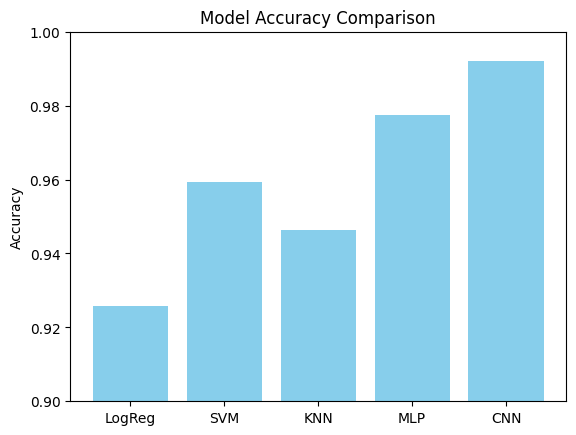

In [ ]:
print("\n--- Accuracy Comparison ---")
print(f"1. Logistic Regression:       {acc_log:.4f}")
print(f"2. Support Vector Machine:    {acc_svm:.4f}")
print(f"3. KNN Classifier:            {acc_knn:.4f}")
print(f"4. Neural Network (MLP):      {acc_mlp:.4f}")
print(f"5. Convolutional Neural Net:  {acc_cnn:.4f}")

# Plot results
algos = ['LogReg', 'SVM', 'KNN', 'MLP', 'CNN']
accs = [acc_log, acc_svm, acc_knn, acc_mlp, acc_cnn]
plt.bar(algos, accs, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.0)
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt

model = load_model("cnn_model.h5")


In [ ]:
def preprocess_image(path):
    # Load image in grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Resize to 28x28
    img_resized = cv2.resize(img, (28, 28))

    # Invert if background is black and digit is white
    if np.mean(img_resized) > 127:  # light background, dark digit (normal)
        img_processed = 255 - img_resized
    else:
        img_processed = img_resized

    # Normalize and reshape for the model
    img_normalized = img_processed / 255.0
    img_reshaped = img_normalized.reshape(1, 28, 28, 1)

    return img_reshaped

In [ ]:
image_path = "test.png"
processed_image = preprocess_image(image_path)

prediction = model.predict(processed_image)
predicted_digit = np.argmax(prediction)

print(f"Predicted digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted digit: 0
